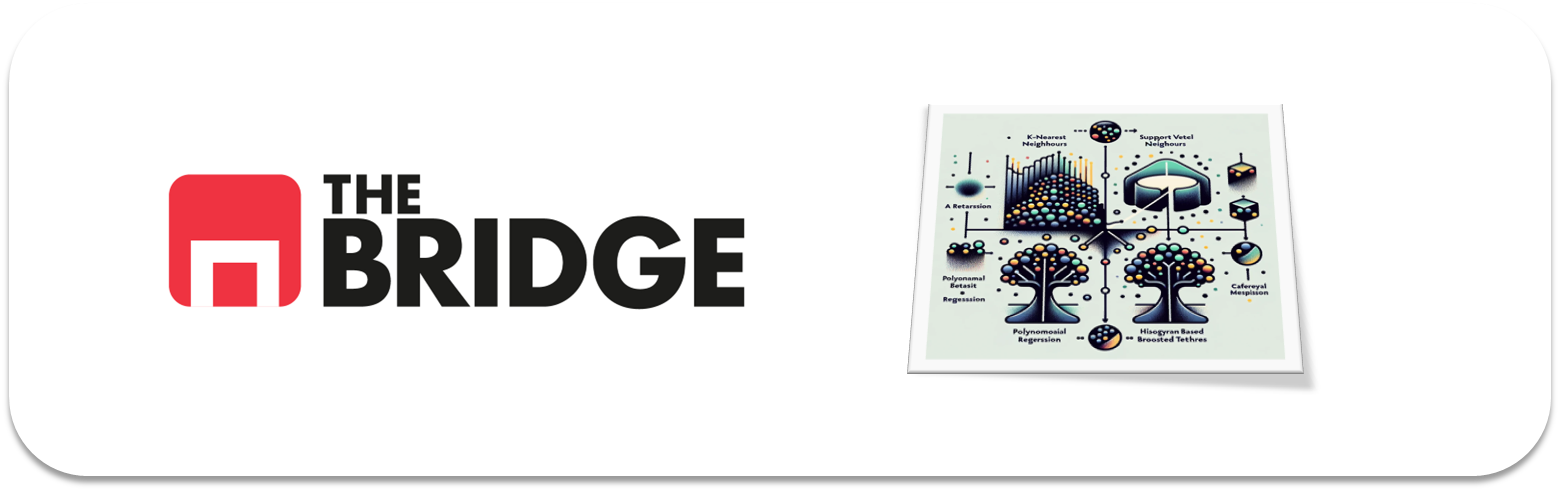

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [114]:
# Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error     # regresion
from sklearn.metrics import balanced_accuracy_score     # clasificacion


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from scipy.stats import shapiro
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import classification_report

'''
from scipy.stats import norm, shapiro
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, balanced_accuracy_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.over_sampling import SMOTE
'''

'\nfrom scipy.stats import norm, shapiro\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.linear_model import LogisticRegression, LinearRegression\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVC, SVR\nfrom sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor\nfrom xgboost import XGBClassifier, XGBRegressor\nfrom catboost import CatBoostClassifier, CatBoostRegressor\nfrom sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor\nroc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, balanced_accuracy_score, mean_absolute_percentage_error\nfrom sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor\nfrom imblearn.over_sampling import SMOTE\n'

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

## Carga del DataSet y Primer Análisis

In [63]:
wines = pd.read_csv("../4-Ejercicio/datasets/wines_dataset.csv", sep="|")
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [64]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                    object
dtype: object

Las columnas CLASS Y QUALITY son las únicas que contienen datos que se pueden categorizar y utilizar como target en el modelo de clasificación. En este caso, de acuerdo al problema de negocio se utiliza "QUALITY".
La variable "ALCOHOL", que es numérica contínua, será la target en el modelo de regresión.

In [65]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Hay un total de 13 columnas y 6497 observaciones, y ninguna contiene valores nulos.

In [66]:
wines.duplicated().sum()

1177

Existen duplicados pero puntualmente en este caso de negocio no se toman en cuenta ya que es normal que tengan observaciones diferentes. Para poder comprobarlo debería tener algún id como el nombre del vino o código qr que lo identifique.

Antes de tratar cada modelo debería hacer la limpieza del conjunto de datos, pero en este caso no es necesaria.

In [67]:
wines_mean = wines.copy()
corr_matrix = wines_mean.corr(numeric_only=True)
corr:list = corr_matrix.quality.abs().sort_values(ascending=False).index

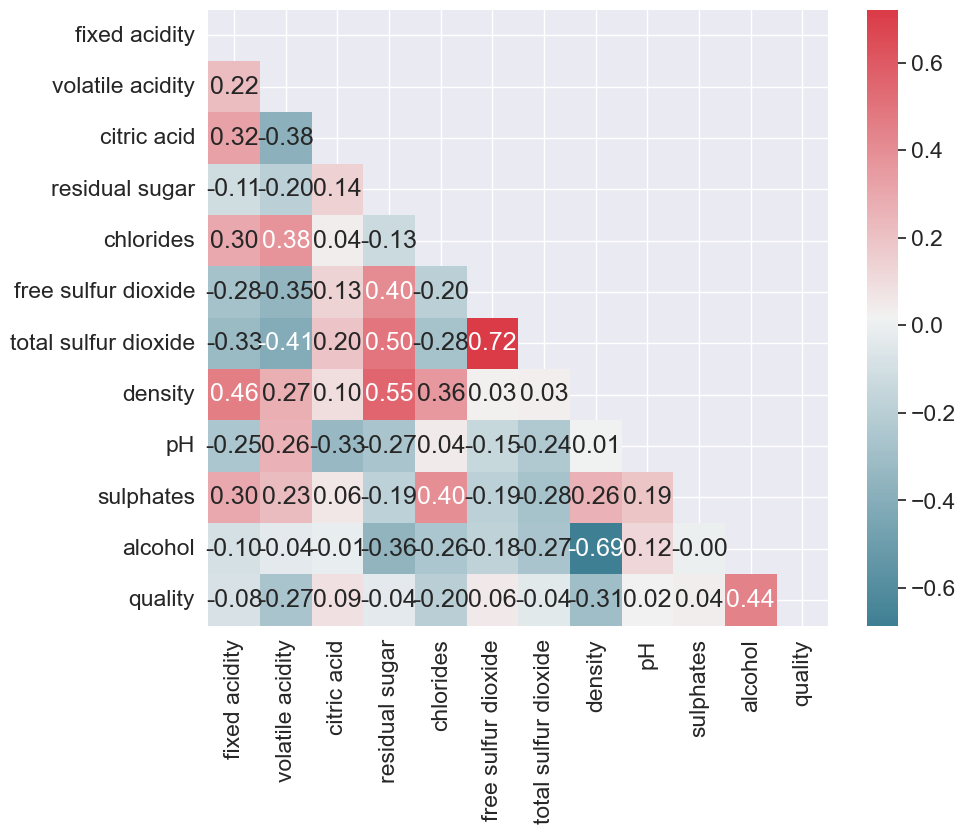

In [68]:
plt.figure(figsize=(10,8))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=
            ".2f", mask=dropSelf)

sns.set(font_scale=1.5)

Puedo ver que DENSITY es una variable que tiene algo de relación mayor que el resto tanto con ALCOHOL (target de regresion) como con QUALITY (target de clasificacion).  
En QUALITY nada sobrepasa el 50%, mientras que en ALCOHOL sí tengo una correlación un poco mas alta.

<Axes: xlabel='quality', ylabel='percent'>

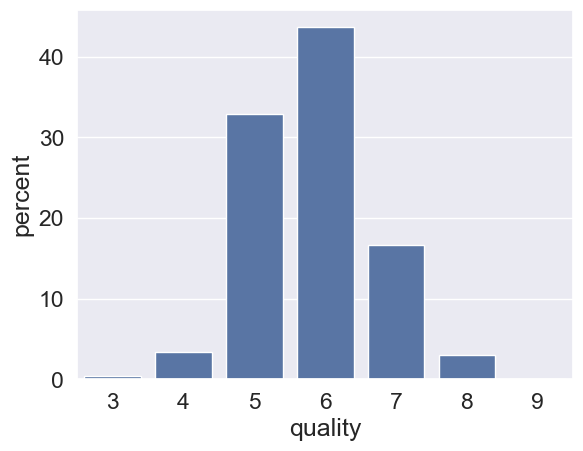

In [69]:
sns.countplot(data= wines, x= "quality", stat="percent")

Con esto se observa que los datos estan desbalanceados.

<Axes: xlabel='alcohol', ylabel='Density'>

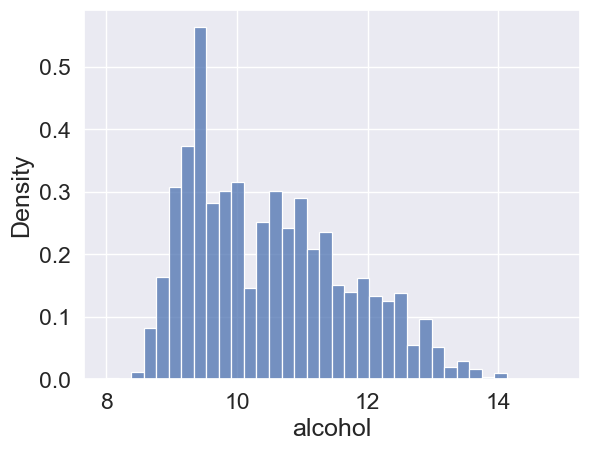

In [70]:
sns.histplot(data=wines, x="alcohol", stat="density")

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

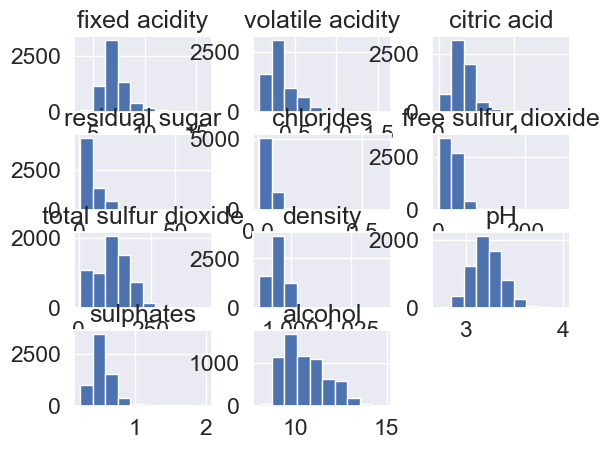

In [71]:
wines.drop(columns=["class","quality"]).hist()

In [72]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: xlabel='quality', ylabel='count'>

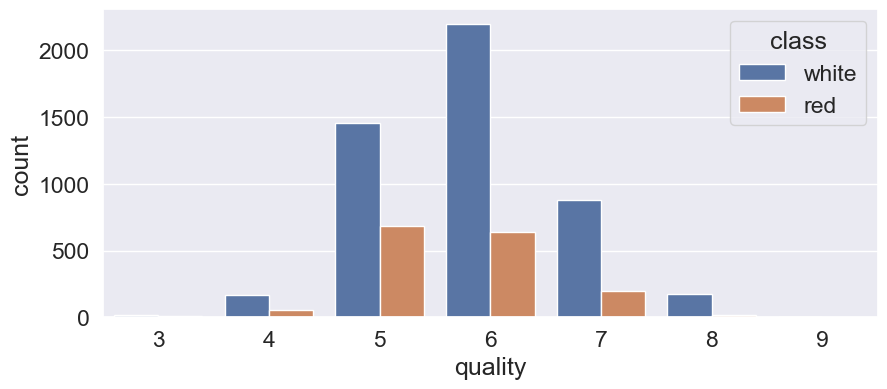

In [73]:
plt.figure(figsize=(10,4))

sns.countplot(x= "quality", hue= "class", data= wines)

In [74]:
wines_1 = wines.copy()  # clasificacion

wines_2 = wines.copy()  # regresion

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

Codificación del parámetro "class"

In [93]:
wines_codificación = pd.get_dummies(wines, "class")
wines_codificación

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,False,True
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,False,True
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,False,True
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,False,True
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,False,True
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,True,False
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,False,True
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,True,False


División en datos de entrenamiento y de prueba

In [94]:
x = wines_codificación.drop(columns=["quality"])
y = wines_codificación["quality"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=40)

Escalado del DataSet

In [95]:
wines_escalado = MinMaxScaler()

x_train_esc = wines_escalado.fit_transform(x_train)
x_test_esc = wines_escalado.transform(x_test)

In [101]:
wines_random_forest = RandomForestClassifier(random_state=40)
wines_random_forest.fit(x_train,y_train)

RandomForestClassifier(random_state=40)

In [107]:
accuracy_wines_train = balanced_accuracy_score(y_train, wines_random_forest.predict(x_train))
accuracy_wines_test = balanced_accuracy_score(y_test, wines_random_forest.predict(x_test))

print("Precisión x_train: ", accuracy_wines_train)
print("Precisión x_test: ", accuracy_wines_test) 

Precisión x_train:  1.0
Precisión x_test:  0.34822686457814667


In [117]:
print(classification_report(y_test, wines_random_forest.predict(x_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.03      0.07        59
           5       0.69      0.71      0.70       516
           6       0.66      0.80      0.72       732
           7       0.72      0.51      0.60       271
           8       0.84      0.39      0.53        41
           9       0.00      0.00      0.00         3

    accuracy                           0.68      1625
   macro avg       0.56      0.35      0.37      1625
weighted avg       0.70      0.68      0.66      1625



c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\feder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [78]:
# x = wines_1.drop(columns="alcohol")
# y = wines_1["alcohol"]

In [79]:
# X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(wines_2.drop(columns='species'), wines_2['species'], test_size=0.2, random_state=42)